# K-NN (K-Nearest Neighbor) Classifier

- '비슷한 특성을 가진 데이터는 비슷한 범주에 속한다'는 가정 하에 정답(y/ target)을 예측하는 가장 간단한 머신러닝 알고리즘

# 1. 데이터 준비

- **도미 데이터**

In [1]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

- **빙어 데이터**

In [2]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

- **도미, 빙어 데이터 합치기**

In [3]:
length = bream_length + smelt_length # 도미와 빙어의 '길이' 리스트를 합친 length 리스트 생성.
weight = bream_weight + smelt_weight # 도미와 빙어의 '무게' 리스트를 합친 weight 리스트 생성.

print('length.shape:', len(length))
print('weight.shape:', len(weight)) # 리스트 길이 출력

length.shape: 49
weight.shape: 49


- **scikit-learn 패키지를 사용하기 위해 리스트 형식의 데이터를 '2차원 리스트'로 변환하기**: `zip` 함수와 리스트 내포 구문을 이용
- **2차원 리스트 형태의 데이터를 넘파이 배열로 변환하기**: `numpy.array()` method 이용
    - 2차원 리스트가 가지런한 행 & 열을 가질 수 있다.

In [4]:
import numpy as np

fish_data = [
             [length, weight] for length, weight in zip(length, weight)
            ]

fish_data = np.array(fish_data)

- **타겟이 도미, 빙어 두 종류이기 때문에 이진분류**
- 다음 챕터에서는 다른 방식으로 이진분류를 해보겠다.

In [5]:
fish_target = [1] * 35 + [0] * 14 # 도미 35 마리, 빙어 14 마리
fish_target = np.array(fish_target)

# 2. 머신러닝 훈련

In [6]:
from sklearn.neighbors import KNeighborsClassifier # K-NN Classifier 호출
kn = KNeighborsClassifier() # 분류 모델 객체 정의
kn.fit(fish_data, fish_target) # 분류 모델 학습
kn.score(fish_data, fish_target) # 잘 학습되었는지 R^2 값 확인

1.0

# 3. 데이터 분리
- 위의 과정은 훈련 세트와 테스트 세트를 분리하지 않았다. 훈련 데이터 그대로 테스트해서 완벽하게 훈련되었다는 점수 (1.0)이 나온 것이다. 알고리즘의 성능을 제대로 평가하기 위해서는 훈련 세트와 테스트 세트를 분리해서 모델 학습을 해야한다.

In [7]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(fish_data, fish_target, test_size = 0.2, random_state = 42)
print(train_data.shape, test_data.shape)
print(train_target, test_target)

(39, 2) (10, 2)
[1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1
 1 0] [1 0 0 0 1 1 1 1 1 1]


- 주로 `scikit-learn` 에서 `train_test_split`을 호출해 훈련 세트와 테스트 세트를 나눈다. 하지만 여기서는 랜덤 샘플링을 위해 다른 방식을 써볼 것이다. 

## 3-1. Random Sampling (랜덤 샘플링)
- 데이터를 분리할 때에는 각 타겟이 골고루 섞여야한다.
- `numpy`에서 제공하는 함수를 이용한다.
- 각 넘파이 배열에서 동일한 인덱스에 대응되는 원소가 같이 선택되기 때문에, 0 ~ 48의 인덱스 중 임의로 35개의 인덱스를 선택하고 해당 원소를 뽑아내는 방식으로 훈련 세트를 만들 수 있다.

In [8]:
np.random.seed(42) # 무작위 결과를 만드는 함수를 실행할 때에는 일정한 결과를 얻기 위해 random.seed 값을 설정해주어야 한다.
                        # random_state 매개변수를 설정하는 것과 같은 이유이다.
index = np.arange(49) # [0, 1, 2, 3, 4, ..., 48]
np.random.shuffle(index) # 인덱스 기준으로 샘플들을 섞어준다.
print(index) # 잘 섞였는지 확인

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [9]:
train_data = fish_data[index[:35]]
train_target = fish_target[index[:35]]

test_data = fish_data[index[35:]]
test_target = fish_target[index[35:]]

print(train_target, test_target)
print(train_data.shape, test_data.shape)

[1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1] [0 0 1 0 1 1 1 0 1 1 0 1 1 0]
(35, 2) (14, 2)


##### numpy의 Array Indexing 기능
- 배열 인덱싱은 여러 개의 인덱스로 한 번에 여러 원소를 선택할 수 있다. `예시: fish_data[[1, 3]]`
- 따라서 `fish_data[index[:35]`는  인덱스 0 부터 34까지에 해당하는 원소들을 배열로 반환한다.

# 5. 분리한 데이터 시각화

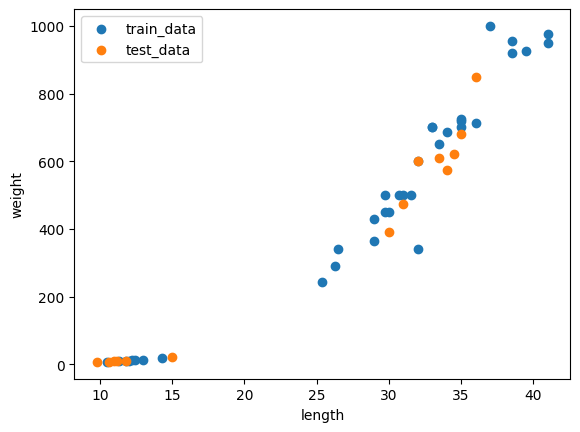

In [10]:
import matplotlib.pyplot as plt

plt.scatter(train_data[:, 0], train_data[:, 1], label = 'train_data')
plt.scatter(test_data[:, 0], test_data[:, 1], label = 'test_data')
plt.legend(loc = 0)

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 6. 머신러닝 재훈련

In [11]:
kn.fit(train_data, train_target)
print(kn.score(train_data, train_target))
print(kn.score(test_data, test_target))

1.0
1.0


# 7. 정확도 비교, 평가

In [12]:
from sklearn.metrics import accuracy_score

pred = kn.predict(test_data)
print(accuracy_score(test_target, pred))

1.0


In [13]:
print(pred)
print(test_target) # 예측한 결과와 테스트 타겟 데이터와 일치.

[0 0 1 0 1 1 1 0 1 1 0 1 1 0]
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]
